In [16]:
import ODESolvers
def func(y, t):
    return (y-1)**2 * (t-1) ** 2

RKF = ODESolvers.RKF(0.005)

In [22]:
y = 0
h = 0.0001 
t = 0
t_max = 5

t_vals = []
y_vals = []

while t <= t_max:
    t_vals.append(t)
    y_vals.append(y)
    result = RKF.next_step(y, h, func, t)
    if result.h < 1e-7:
        print("Step Size too small")
        break
    if result.accepted:
      y = result.y
      t += h

    h = result.h;
    y = result.y

In [7]:
import matplotlib.pyplot as plt

In [18]:
t1 = []
y1 = []
with open("../example.txt") as f:
   for line in f.readlines():
      _t, _y = line.split(",")
      t1.append(float(_t))
      y1.append(float(_y))


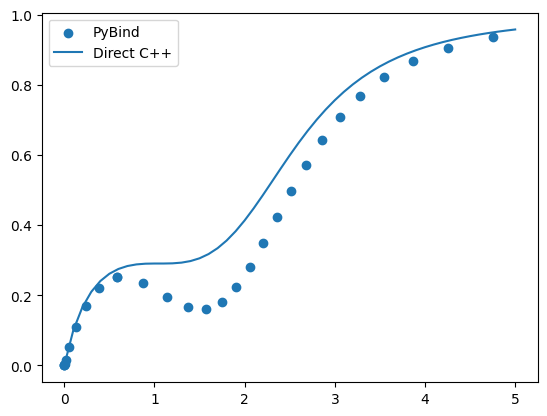

In [23]:
plt.scatter(t_vals, y_vals, label="PyBind")
plt.plot(t1, y1, label="Direct C++")
plt.legend()
plt.show()